# Проект "Исследование надежности заемщиков"

## Описание проекта и данных

Кредитному отделу банка необходимо разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Описание данных

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита


### Инструкция по выполнению

**Загрузка и изучение данных**

Загрузите файл `scoring_data.csv` и изучите общую информацию о данных.

**Предобработка данных**
1.	В двух столбцах есть пропущенные значения, найдите их и заполните медианным значением по столбцу. Оцените, какую долю составляют пропущенные значения в каждом из столбцов с пропусками и объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.
2. Замените вещественный тип данных в столбце `total_income` на целочисленный. Используйте, например, метод `astype()`.
3. Проверьте, присутствуют ли в данных строки-дубликаты. Удалите их при обнаружении. Обработайте неявные дубликаты. В столбце `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к одному регистру. Проверьте остальные столбцы.
4. Обработайте значения в столбцах с аномалиями и укажите возможные причины появления таких данных. Например, отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально.
5.	На основании диапазонов, указанных ниже, создайте столбец `total_income_category` с категориями:
*	0–30000 — $E$;
*	30001–50000 — $D$;
*	50001–200000 — $C$;
*	200001–1000000 — $B$;
*	1000001 и выше — $A$.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

6.	Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:
* операции с автомобилем,
* операции с недвижимостью,
* проведение свадьбы,
* получение образования.

Например, если в столбце `purpose` находится подстрока `на покупку автомобиля`, то в столбце `purpose_category` должна появиться строка `операции с автомобилем`.

Напишите собственную функцию и используйте метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.

7. Ответьте на следующие вопросы.
*	Есть ли зависимость между количеством детей и возвратом кредита в срок?
*	Есть ли зависимость между семейным положением и возвратом кредита в срок?
*	Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*	Как разные цели кредита влияют на его возврат в срок?

Результаты представьте в виде таблиц и графиков.

## Изучение общей информации о данных


In [3]:
# импорт библиотек pandas, numpy, seaborn и matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os #для работы с операционной системой

Обычно данные хранятся в файле, которую нужно привести к виду таблицы.
Чаще всего вы будете работать с файлами `.csv` (англ. `Comma-Separated Values`, «значения, разделённые запятой»). Часто такие файлы с данными называют датасетами.

Для чтения файла используют метод `read_csv()` библиотеки `pandas`. В качестве аргумента он принимает путь к файлу. Путь к файлу — строка с именем файла и каталогами, в которые он вложен.

Например, прочитаем файл `file_name.csv` и перенесем данные из файла в датафрейм с именем `df`:

`df = pd.read_csv('file_name.csv')`.

Если чтение файла выполняется не из сессионной папки, а с Вашего Google Диска, то необходимо дать доступ к `drive`. Для этого используйте конструкцию

* `from google.colab import drive`
* `drive.mount('/content/drive')`
* `df = pd.read_csv('/content/drive/My Drive/file_name.csv')`

In [4]:
# чтение файла с данными и сохранение в df
os.chdir(r"C:\Users\pasht\OneDrive\Документы\4 курс 1 семестр\искусственный интелект в прикладных задачах")
df = pd.read_csv("scoring_data.csv", sep=",")

Для того, чтобы выводить не весь DataFrame, а только часть, можно использовать следующие приемы:

* Вывод первых 5 строк - `df.head()`
* Вывод последних 5 строк - `df.tail()`
* Вывод 5 случайных строк - `df.sample(5)`

Полезные методы, которые вы можете использовать, для того, чтобы посмотреть на размер данных, названия признаков и их типы:

* `df.shape` - покаывает размер датафрейма

* `df.columns` - показывает названия признаков (столбцов)

* `df.dtypes` - показывает информацию о типах данных

* `df.info()` - показывает информацию о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти.

* `df.describe()` - показывает количество строк в столбце, среднее значение столбца, столбец стандартное отклонение , минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%. Любые значения `NaN` автоматически пропускаются. По умолчанию, метод `describe( )` пропускает строки и столбцы не содержащие чисел - категориальные признаки. Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include = 'all'`, чтоб вывести статистику по всем имеющимся признакам.


In [7]:
# получение первых 5 строк таблицы df методом head()
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [9]:
# получение общей информации о данных в таблице df методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В таблице 12 столбцов по 21525 записей. Тип данных в столбцах соответствуют хранящимся в них данных.

В названиях колонок нарушений стиля не обнаружено. Переименовывать столбцы нет необходимости.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы — данные о заемщиках банка. Часть колонок описывает клиента: общий трудовой стаж, возраст, уровень образования, семейное положение, пол, тип занятости, ежемесячный доход. Столбцы `education_id` и `family_status_id` выполняют роль перевода качественной характеристики заемщика в количественную, т.е. ставят в соответствие статусу семейного положения и уровня образования метку. Поэтому в целом можно сказать, что данные столбцов `education` и `family_status` продублированы в соответствии с их количественными идентификаторами и могут быть удалены из датасета из-за отсутствия информативности.
Столбцы `debt` и `purpose` характеризуют клиента относительно процедуры кредитования, учитывают его кредитную историю.

Устраним проблемы в данных.

## Предобработка данных

### Пропуски


Для обнаружения недостающих данных используют методы `isnull()` и `notnull()`.

Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

Например, `df.isnull().sum()` сформирует сводную таблицу с названием столбца таблицы и количеством пропущенных записей в этом столбце.

In [13]:
# подсчёт количества пропусков
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [11]:
# подсчёт доли пропусков
dolya = 2174/21525
dolya

0.10099883855981417

В столбцах `days_employed` и `total_income` имеются одинаковое количество пропущенных значений. Оба столбца - количественные, поэтому пропуски логично заполнить числовыми значениями.


Пропуски составляют 10% от объема данных в соответствующих столбцах, удалять такое не следует, достаточный объем данных для изменения основных характеристик.

Возможно, пропуски связаны с отсутствием занятости клиента, поэтому у него нет среднего дохода и стажа работы. Это вполне логично. Т.к. доля пропущенных значений невелика, то это не сильно повлияет на итоговый результат. Но эти пропуски могут быть связаны либо с отсутствием информации по этим пунктам, либо просто с отсутствием постоянного дохода и места работы заемщика.  Но в столбце `income_type` пропусков нет. Поэтому есть предположение, что сотрудники банка просто не внесли данную информацию при заполнении анкеты.

Для заполнения пропусков в данных используют метод `fillna(value=None, method=None)`.

Он заменяет все значения `NaN` на одно и то же новое значение, которое передается как аргумент функции (`value= 5` заменит все пропущенные значения на 5).

Стратегия заполнения - аргумент `method= ‘backfill’, ‘bfill’, ‘ffill’` - заполнение значениями из предшествующей (аргумент `method='bfill'`) либо последующей записи (`method='ffill'`)


Заменим пропущенные значения медианными значениями в соответствии в профессией заемщика. Для этого укажем в методе `fillna()` в качестве значения медианные значения по столбцу `total_income` после группировки данных по столбцу `income_type`.

In [15]:
df.groupby(['income_type'])['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [17]:
# Заменим пропущенные значения медианными значениями в соответствии с профессией заемщика
df['total_income'].fillna(df.groupby(['income_type'])['total_income'].transform('median'), inplace = True) 
#заполняем 

# Сделайте аналогичную замену пропусков в столбце days_employed
df['days_employed'].fillna(df.groupby(['income_type'])['days_employed'].transform('median'), inplace = True)


# проверка заполненности пропусков
df.isnull().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типа данных


Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [19]:
df['total_income']=df['total_income'].astype('int')
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int32
purpose              object
dtype: object

### Дубликаты

Для обнаружения явных дубликатов используют метод `duplicated()`.


Результатом является логическое значение, указывающее, действительно ли значение, переданное в аргумент, отсутствует. «Истина» означает, что значение является отсутствующим значением, а «Ложь» означает, что значение не является отсутствующим.

Сумма значений находится методом `sum()`.

Например, `df.duplicated().sum()` определит общее количество дублирующих записей во всем датасете.

In [21]:
# подсчёт явных дубликатов
df.duplicated().sum()

54

Чтобы избавиться от таких дубликатов, вызовем метод `drop_duplicates()`:

`df = df.drop_duplicates() `

Обратите внимание, что этот метод не меняет исходный датафрейм.

После удаления строчек лучше обновить индексацию: чтобы в ней не осталось пропусков. Для этого вызовем метод `reset_index()`. Он создаст новый датафрейм, где:
*	индексы исходного датафрейма станут новой колонкой с названием `index`,
*	все строки получат обычные индексы, уже без пропусков.
*	`df = df.drop_duplicates().reset_index()`

Можно и не создавать столбец `index`. Для этого у метода `reset_index()` изменим специальный параметр:

`df = df.drop_duplicates().reset_index(drop=True) `

Таким образом, удалить пропуски можно тремя способами:
*	сохранить те же индексы строк, что были у них до удаления дубликатов;
*	сбросить индексы строк, но сохранить их в новой колонке `index`;
*	просто сбросить индексы строк.


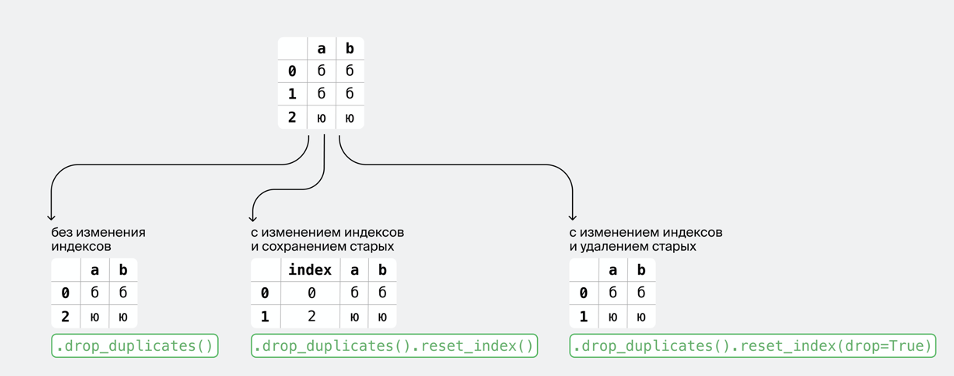

In [23]:
# удаление явных дубликатов (с удалением старых индексов и формирование новых)
df = df.drop_duplicates().reset_index(drop=True)  
#ресет индекс обновляет индексы в соответсвии с расположением, потому что когда мы удалили дубликаты у нас индексы остались старыми и идут не по порядку
# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [25]:
df.shape

#размер датасета, (сроки, столбцы)

(21471, 12)

Определим все уникальные записи в столбце `education`. Для этого используют метод `unique()`.

Метод `sort_values()` выполняет сортировку данных в порядке возрастания. Если необходимо изменить порядок сортировки, то в качестве аргумента метода `sort_values()` следует указать `ascending=False`.

In [27]:
# Выведем на экран список уникальных названий education, отсортированный в алфавитном порядке
df['education'].sort_values().unique()

array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

Видим, что названия записаны в разном регистре, поэтому переведем все записи в нижний регистр для устрания неявных дубликатов и выведем полученный список уникальных значений.

Для перевода записей в нижний регистр используют метод `lower()`. Метод `str.lower()` вернет копию строки `str`, в которой все символы будут преобразованы в нижний регистр.

* Для преобразования строки в верхний регистр используйте метод строки `str.upper()`.
* Для того, что бы каждое слово в строке начиналось с заглавной буквы используйте метод `str.title()`.

In [29]:
df['education'] = df['education'].str.lower()
df['education'].sort_values().unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

После записи в нижнем регистре все записи имеют одинаковое начертание. Проверим, не появились ли при этом в данных дублирующие записи.

In [31]:
# проверка на количество дубликатов
df.duplicated().sum()

17

In [33]:
#Дубли остались, поэтому удалим эти явные дубликаты (с удалением старых индексов и формированием новых)
df = df.drop_duplicates().reset_index(drop=True) 

# проверка на отсутствие дубликатов
df.duplicated().sum()

0

In [35]:
# Выведем на экран список уникальных названий family_status, отсортированный в алфавитном порядке
df['family_status'].sort_values().unique()

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

В столбце `family_status` неявных дубликатов не обнаружено.

In [37]:
# Выведем на экран список уникальных названий income_type, отсортированный в алфавитном порядке
df['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

В столбце `income_type` неявных дубликатов не обнаружено.

In [39]:
# Выведем на экран список уникальных названий purpose, отсортированный в алфавитном порядке
df['purpose'].sort_values().unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

In [41]:
df.shape

(21454, 12)

In [43]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21450,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21451,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21452,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


Многие записи дублируют друг друга, но имеют различную формулировку. Скорее всего, наличие такого большого количества различных записей связано со свободной формой заполнения соответствующих данных и отсутствием единого формата.



Таким образом, все неявные дубликаты устранены либо записью в нижнем регистре, либо заменой дублирующих значений. Наличие большого количества дубликатов связано с отсутствием единой формы записи. Каждый оператор при внесении соответствующих сведений полагается на собственный опыт, интуицию и способности. Пропусков не осталось. Явные дубликаты устранены.

### Аномальные значения

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. Вычислить их можно методами `mean()` и `median()`.

Однако, помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего и насколько их много.

Самое простое, что можно посчитать для оценки разброса, — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

Квартили (от лат. `quartus` — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль `Q1` — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль `Q2`, половина элементов больше и половина меньше неё. Третий квартиль `Q3` — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него.

Межквартильный размах — это расстояние между `Q1` и `Q3`.

Увидеть медиану и квартили в `Python` можно на специальном графике. Его называют диаграммой размаха или «ящиком с усами».

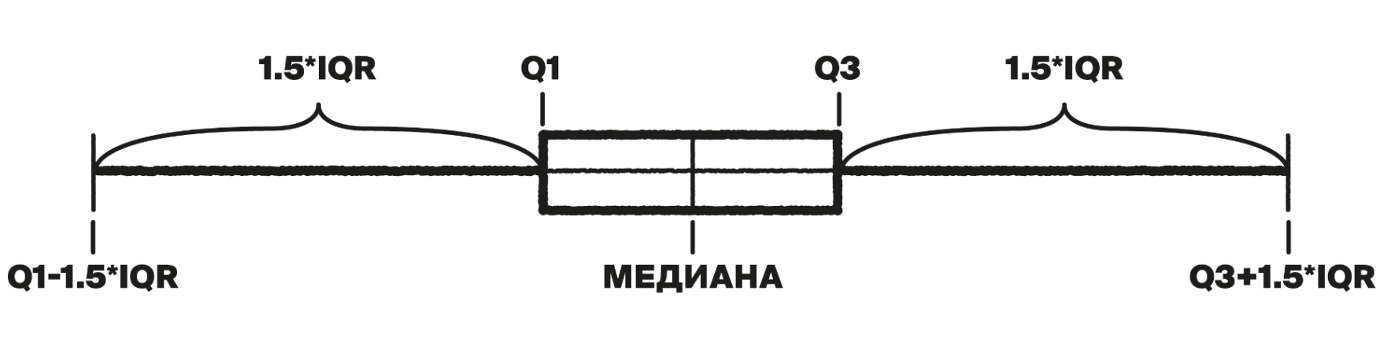

«Ящик» ограничен первым и третьим квартилями.

Внутри ящика обозначают медиану.

«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо `IQR`, от англ. `interquartile range`, «межквартильный размах»).

В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».


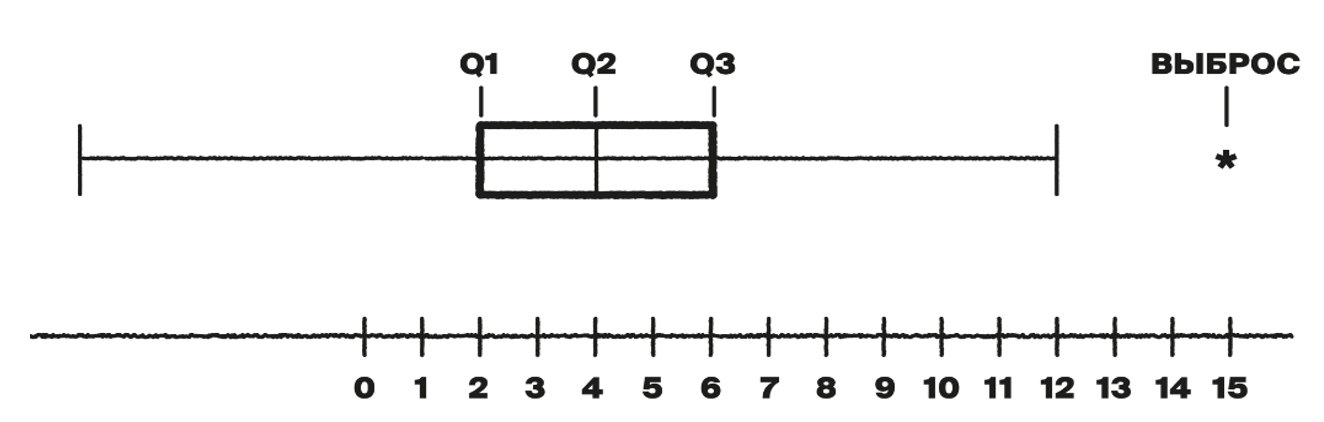

В `Python` диаграмму размаха строят методом `boxplot()` (от англ. `box-and-whisker plot` — «график „ящик с усами“») библиотеки `seaborn`.

Напомним, что `seaborn` — это надстройка над `matplotlib`, поэтому инструменты этих двух библиотек можно комбинировать. Для настройки стиля графика и некоторых других параметров будем использовать `matplotlib`, а сам график построим с помощью `seaborn`.

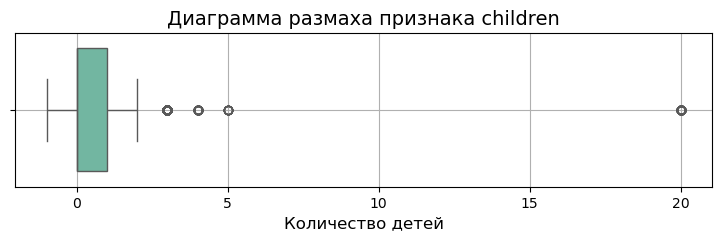

In [45]:
# Построим диаграмму размаха для признака children

# Задаем размер графика в направлении оси X и Y
plt.figure(figsize = (9,2)) 

# Задаем заголовок графика и размер шрифта
plt.title("Диаграмма размаха признака children", fontsize=14) 

# Указываем, какие данные необходимо отобразить и в направлении какой оси
sns.boxplot(x = df['children'], palette='Set2')       

# Подпись оси X и размер шрифта
plt.xlabel('Количество детей', fontsize = 12)   
plt.grid() # Добавляем линии сетки
plt.show()  # Показать график

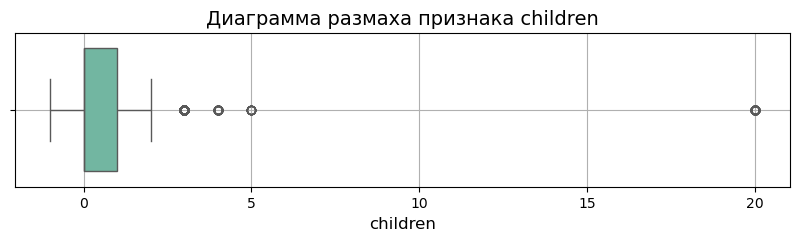

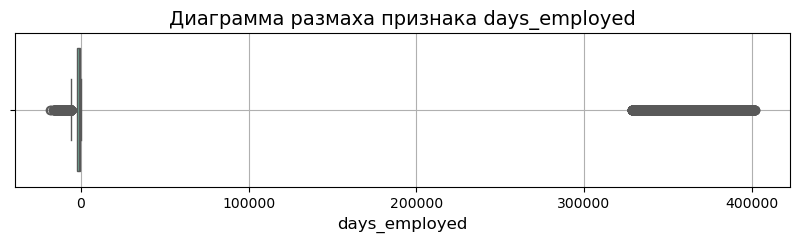

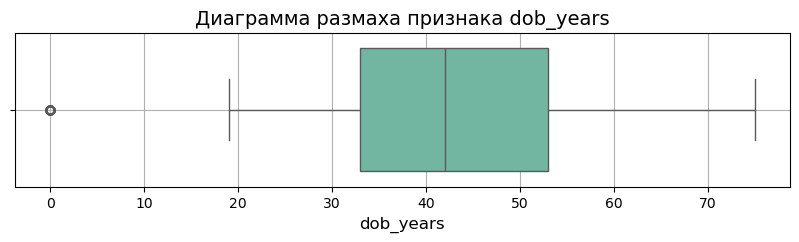

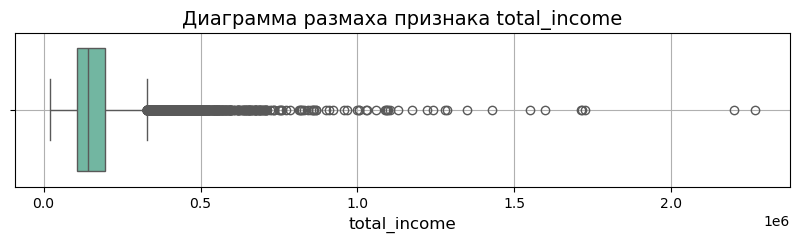

In [47]:
# Построим диаграммы размаха для нескольких признаков
# Для этого используем цикл, переменной цикла будет название столбца, график которого будем строить

col_list = ['children', 'days_employed', 'dob_years', 'total_income'] # Задаем список из названий столбцов, графики которых будем строить

for name in col_list:
    # Задаем размер графика в направлении оси X и Y
    fig = plt.figure(figsize = (10,2)) 
    # Задаем заголовок графика и размер шрифта
    plt.title("Диаграмма размаха признака "+name, fontsize=14) 
    
    # Указываем, какие данные необходимо отобразить и в направлении какой оси
    # Можем задать цветовую гамму в виде множества цветов из выбранной цветовой гаммы palette=
    sns.boxplot(x = df[name], palette='Set2')
    
    # Подпись оси X и размер шрифта                                                
    plt.xlabel(name, fontsize = 12) 
    plt.grid() # Добавляем линии сетки
    plt.show()  # Показать график

Изобразим диаграммы размаха методом `violinplot()` (англ. «график-скрипка»).

Как и `boxplot()`, этот график характеризует форму распределения. Необычный внешний вид получается из-за сложения двух графиков плотности распределения.

Основное преимущество перед `boxplot()` — возможность изучить распределение и установить его тип.

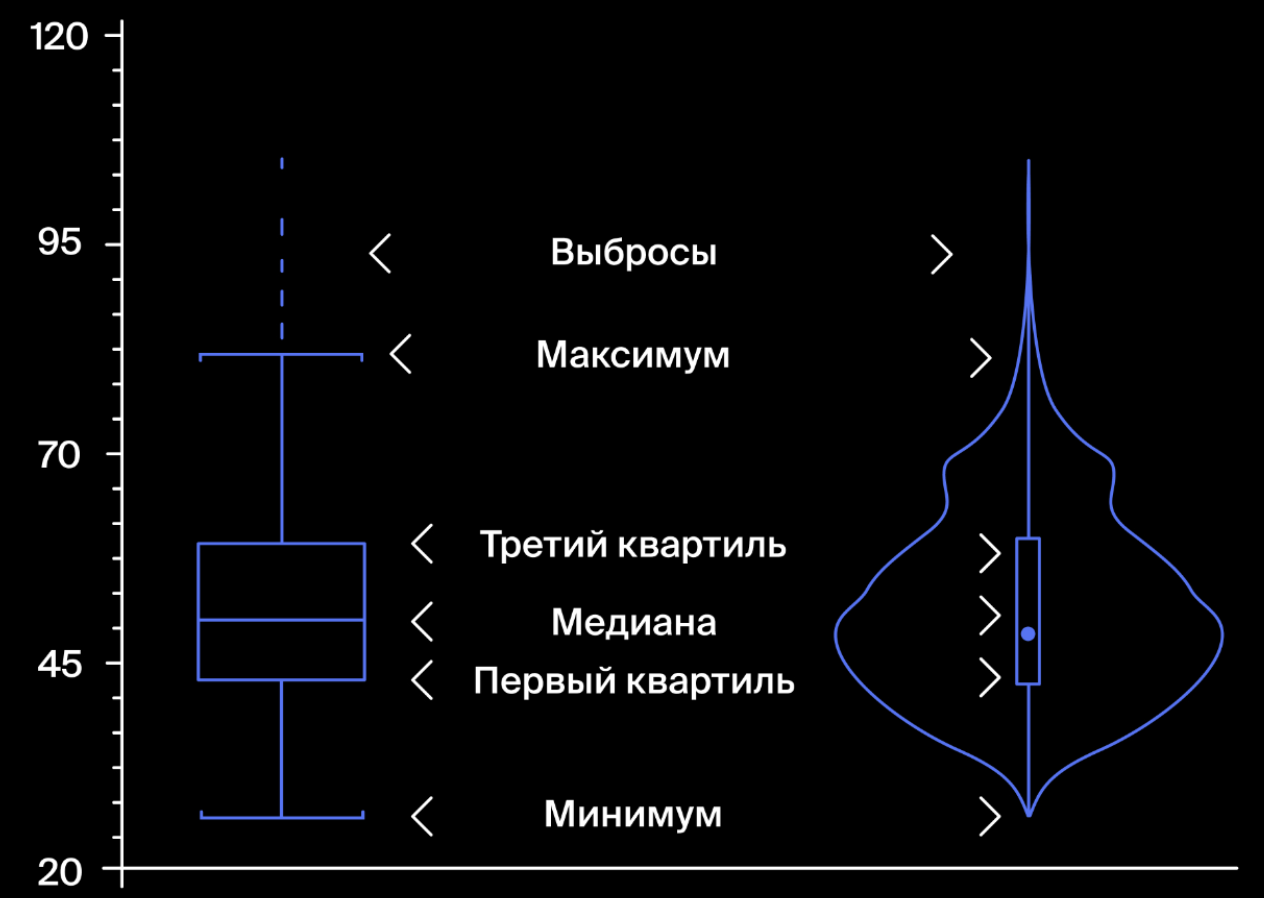

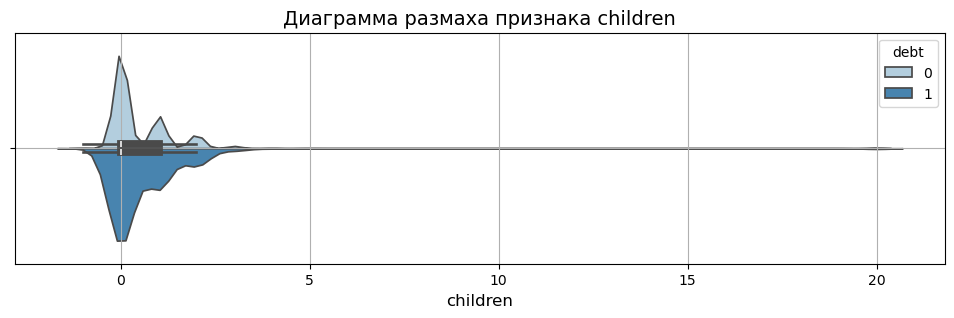

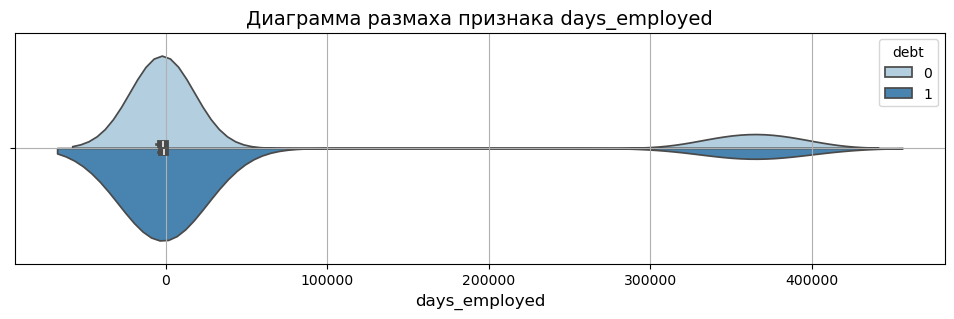

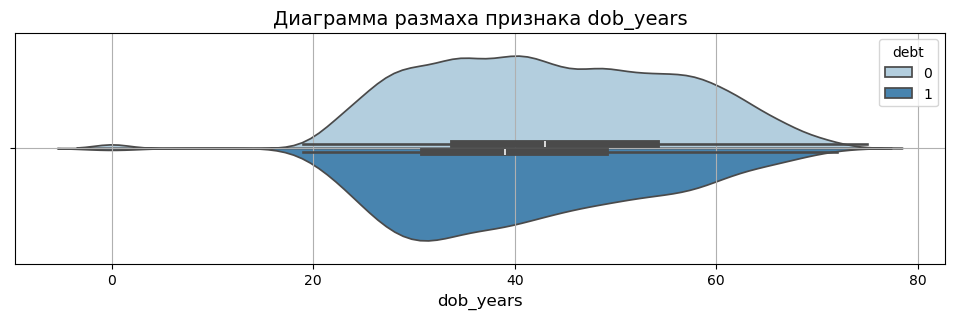

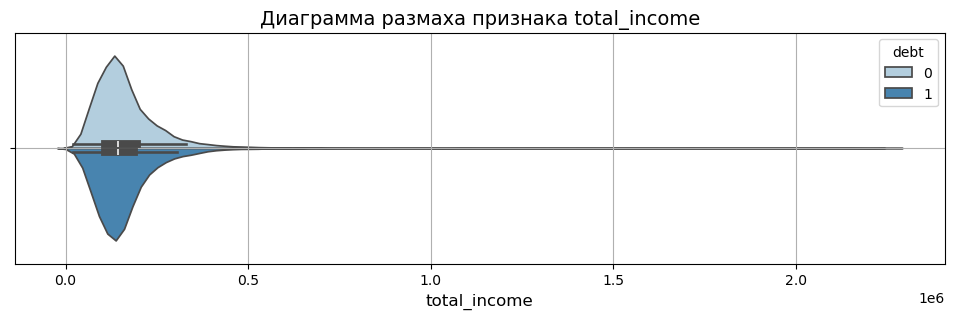

In [49]:
# Построим диаграммы размаха в виде скрипки для нескольких признаков
# Для этого используем цикл, переменной цикла будет название столбца, график которого будем строить
# Цикл будет выглядеть аналогично предыдущему, только вместо диаграммы boxplot изобразим график violinplot
for name in col_list:
    fig = plt.figure(figsize = (12,3)) # Задаем размер графика в направлении оси X и Y
    plt.title(f"Диаграмма размаха признака "+name, fontsize=14) # Задаем заголовок графика и размер шрифта
    
    sns.violinplot(x = df[name], hue = df['debt'], split=True, palette='Blues')       # Указываем, какие данные необходимо отобразить и в направлении какой оси
                # Можем задать цветовую гамму в виде множества цветов из выбранной цветовой гаммы palette=
#hue это в одном графике мы делаем разделение (вон у нас на одном графике два графика) то есть фильтер, депт принимает два значения 0 и 1 и график для 0 и 1 

    
    plt.xlabel(name, fontsize = 12) # Подпись оси X и размер шрифта
    plt.grid() # Добавляем линии сетки
    plt.show()  # Показать график

**Оценим статистические характеристики числовых признаков.**

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В `Python` его получают методом `describe()` (пер. «описать, охарактеризовать»). Результат работы метода — список характерных значений.

Правильно истолковать значения на диаграмме размаха трудно. Можно сравнить числовое описание, которое выдаёт метод `describe()`, с диаграммой размаха. Так вы графически отобразите распределение данных и зафиксируете важные значения в числах. Обратите внимание, что значения 25% и 75% в выдаче метода `describe()` — это `Q1` и `Q3` соответственно.

In [51]:
# Выведем описательную статистику и проанализируем полученные результаты
df.describe()
#df.describe(include=object)

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,2.145400e+04
mean,0.539946,63304.511872,43.271231,0.817097,0.973898,0.081150,1.653196e+05
std,1.383444,140947.072148,12.570822,0.548674,1.421567,0.273072,9.818730e+04
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,-2575.665602,33.000000,1.000000,0.000000,0.000000,1.076230e+05
50%,0.000000,-1354.642207,42.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,-317.312251,53.000000,1.000000,1.000000,0.000000,1.958202e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Среднее число отработанных дней(стаж работы) составляет 56557.34 дней, что соответствет 154.95 года. При этом минимальное значение отрицательно, чего не может быть. Возможно, при внесении данной информации была допущена ошибка по невнимательности. Выясним, сколько таких отрицательных значений.

Для получения данных, удовлетворяющих условию, необходимо использовать "срез" данных. Его можно получить методом `query` или использовать логическую индексацию.

Метод `query` в `pandas` позволяет извлекать определенные строки из фрейма на основе определенных условий. Метод принимает строку, содержащую допустимое выражение, которое может ссылаться на столбцы внутри фрейма. Это обеспечивает интуитивно понятный способ выбора и фильтрации строк из фрейма данных на основе определенных критериев. По сути, это создание сложных запросов для выбора конкретных данных.

Синтаксис метода `query`:  `DataFrame.query(expr, *, inplace=False, **kwargs)`


При использовании логической индексации можем применить следующую запись:

`df['условие на данные']`


In [53]:
df[df['days_employed']<0].shape[0]

17623

In [55]:
df.query('days_employed<0').shape[0]

17623

Всего отрицательных значений в столбце `days_employed` имеется 18080, что составляет 83.9%. Это очень много. Удалить эти данные нецелесообразно, т.к. их слишком много. Скорее всего, это ошибка оператора. Заменим отрицательные значения на их абсолютные значения. Для вычисления абсолютных занчений используем метод `abs()`

In [57]:
df['days_employed'] = df['days_employed'].abs() 
df.query('days_employed<0').shape[0]

0

Следующее непонятное значение - минимальное количество детей = -1, максимальное количество детей = 20. По поводу значения -1 есть подозрение, что это опечатка. Касательно 20 детей - всё может быть. Это может быть семья с приемными детьми. Выясним, какие значения имеются для количества детей в семье.

Определим количество записей каждого класса. Для этого используем метод `value_counts`, который выполняет группировку данных по указанному столбцу и подсчитывает количество записей каждого значения. Если в качестве параметра указать `normalize=True`, то метод произведет вычисление значений с долевом отношении.

In [59]:
#  Выведем весь список значений столбца children
df['children'].value_counts(normalize=True)


children
 0     0.656801
 1     0.224107
 2     0.095646
 3     0.015382
 20    0.003542
-1     0.002191
 4     0.001911
 5     0.000420
Name: proportion, dtype: float64

Количество отрицательных значений невелико (около 0.2%), поэтому все значения `children` = -1 удалим из датасета.

Касательно значения `children` = 20 есть сомнения. Т.к. это следующее после `children` = 5 значение, то есть подозрение, что это должны быть значения `children` = 2. Т.к. достоверно неизвестно, с чем связана эта "ошибка", то будем считать, что это ошибка записи. Количество значений `children` = 20 невелико (около 0.35%), поэтому все значения `children` = 20 удалим из датасета.


In [63]:
# Удалим из датасета некорректные значения, т.к. их доля мала
# Для выбора необходимых данных используем срез методом query и укажем сразу два условия, которым должны удовлетворять данные
df.query('children >=0 & children != 20', inplace=True)



In [67]:
# Снова выведем описательную статистику и проверим выполненные замены
df.describe()

df = df.query('dob_years != 0')
df.describe()



,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21231.000000,21231.000000,21231.000000,21231.000000,21231.000000,21231.000000,2.123100e+04
mean,0.473977,67113.843406,43.481795,0.817672,0.973200,0.081202,1.653857e+05
std,0.752179,139251.657979,12.248231,0.549363,1.421187,0.273152,9.842317e+04
min,0.000000,24.141633,19.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1024.737321,33.000000,1.000000,0.000000,0.000000,1.075550e+05
50%,0.000000,1999.894891,43.000000,1.000000,0.000000,0.000000,1.425940e+05
75%,1.000000,5337.759969,53.000000,1.000000,1.000000,0.000000,1.958195e+05
max,5.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [69]:
# Для изучения характеристик категориальных признаком можно указать в методе describe() параметр include = 'object'
df.describe(include = 'object')



,education,family_status,gender,income_type,purpose
count,21231,21231,21231,21231,21231
unique,5,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,15012,12213,14021,10961,785


In [71]:
# Выведем на экран список уникальных значений пола клиента (gender)
df['gender'].unique()


array(['F', 'M', 'XNA'], dtype=object)

In [73]:
# Доля значений gender = XNA 

df['gender'].value_counts(normalize = True)



gender
F      0.660402
M      0.339551
XNA    0.000047
Name: proportion, dtype: float64

In [75]:
# Удалим из датасета некорректные значения, т.к. их доля мала

# Удалим из датасета некорректные значения (XNA), т.к. их доля мала
df = df.query('gender != "XNA"')
df['gender'].value_counts(normalize = True)

gender
F    0.660433
M    0.339567
Name: proportion, dtype: float64

### Создание категорий


На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:
*	0–30000 — 'E';
*	30001–50000 — 'D';
*	50001–200000 — 'C';
*	200001–1000000 — 'B';
*	1000001 и выше — 'A'.

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [79]:
# Создадим функцию с именем income_group, которая будет принимать на вход доход клиента и возвращать номер категории
def income_group(income):
    if income <= 30000:
        return 'E'
    elif income <= 50000:
        return 'D'
    elif income <= 200000:
        return 'C'
    elif income <= 1000000:
        return 'B'
    else:
        return 'A'

Метод `apply()` — это инструмент для преобразования объекта DataFrame. `аpply()` можно применять как к одному столбцу, так и к нескольким.

`DataFrame.apply(func, axis=0)`

В аргументе метода `apply()` отдельная функция. Она принимает на вход каждый элемент столбца и выполняет над ним описанное преобразование.

Применим метод `apply()` к столбцу `total_income` и выполним преобразование на основе написанной функции `income_group`.

In [81]:
# применим функцию к столбцу total_income и уточним категорию среднего дохода заемщика.
#Добавим соответствующий столбец в таблицу

df['total_income_category'] = df['total_income'].apply(income_group)
df[['total_income', 'total_income_category']].head()
df.sample(6)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
17434,0,690.784611,35,высшее,0,гражданский брак,1,F,компаньон,0,106089,свадьба,C
20666,0,1359.020926,50,среднее,1,женат / замужем,0,F,компаньон,0,172244,покупка жилья для семьи,C
7543,0,344702.463094,61,высшее,0,Не женат / не замужем,4,F,пенсионер,0,165471,операции с жильем,C
3411,0,3562.332226,55,среднее,1,женат / замужем,0,F,сотрудник,0,53416,операции с коммерческой недвижимостью,C
14620,0,1574.202821,39,среднее,1,женат / замужем,0,F,сотрудник,0,142594,заняться образованием,C
12840,2,3983.152363,37,среднее,1,гражданский брак,1,F,сотрудник,0,100931,сыграть свадьбу,C


### Создание функции для категоризации данных


In [83]:
# Выведем на экран список уникальных названий purpose, отсортированный в алфавитном порядке
sorted(df['purpose'].unique())



['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

In [85]:
# Создадим функцию с именем purpose_group, которая будет принимать на вход формулировку цели получения кредита
# и возвращает унифицированную формулировку этой цели
def purpose_group(purpose):
    if 'автомобил' in purpose or 'свой автомобиль' in purpose or 'сделка с автомобилем' in purpose:
        return 'операции с автомобилем'
    elif 'образован' in purpose or 'обучение' in purpose or 'профильное' in purpose:
        return 'получение образования'
    elif 'жиль' in purpose or 'недвижим' in purpose or 'строит' in purpose or 'ремонт' in purpose:
        return 'операции с недвижимостью'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    else:
        return 'другое'

In [89]:
# применим функцию purpose_group к столбцу purpose и уточним категорию указанных целей кредитования.
# Добавим соответствующий столбец в таблицу и выведем первые 10 строк

df['purpose_category'] = df['purpose'].apply(purpose_group)
df.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


## Выводы


Ответим на вопросы
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
*	Есть ли зависимость между семейным положением и возвратом кредита в срок?
*	Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
*	Как разные цели кредита влияют на его возврат в срок?


Для формирования сравнительных таблиц можно использовать метод `groupby`. Операция группировки включает в себя некоторую комбинацию разделения объекта, применения функции и объединения результатов. Это можно использовать для группировки больших объемов данных и выполнения операций над этими группами.

**Связь между кредитами и количеством детей**

Для отображения изменений — по времени или категориям — удобно использовать линейный график. Заранее сгруппируем данные и сформируем необходимую таблицу. Стиль графика назначим средствами библиотеки `seaborn`.

In [91]:
# готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = df.groupby('children')['children'].count()
data_ch

children
0    14021
1     4792
2     2039
3      328
4       41
5        9
Name: children, dtype: int64

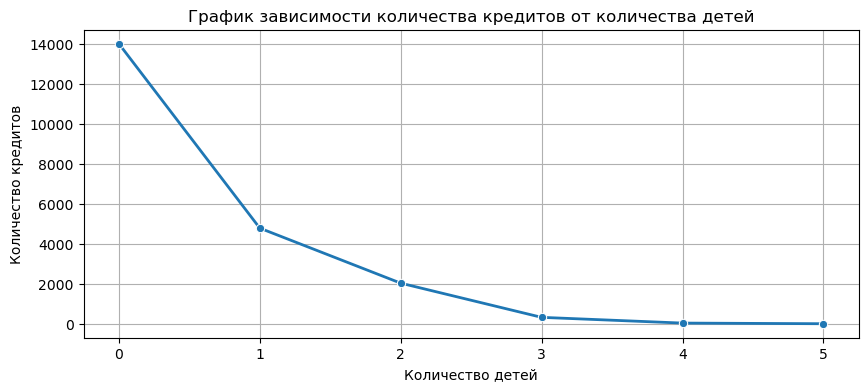

In [95]:
# назначаем размер графика
plt.figure(figsize=(10, 4))

# строим линейный график средствами seaborn по данным 
sns.lineplot(x=data_ch.index, y=data_ch.values, marker='o', linewidth=2)


# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
plt.grid()
# отображаем график на экране
plt.show()

График получился достаточно наглядным: видно, как падает число выданных кредитов в зависимости от числа детей в семье заёмщика. Возможно, это не связано с тем, что многодетные семьи реже берут кредиты. Скорее всего, семей без детей или с 1–2 детьми намного больше, чем многодетных. В таком случае стоит рассматривать относительные величины.

Для группировки данных подходит комбинация методов `groupby()` и `agg()` .

Метод `groupby()` принимает один аргумент — столбец (или список столбцов), по которым группируют данные. В метод `agg()` передают словарь. Его ключ — это названия столбцов, а значение — функции, которые будут к этим столбцам применены (например, `sum` или `count`). Такие функции называются агрегирующие.


Сформируем таблицу, отражающую количество выданных кредитов и долю из возвратов в зависимости от количества детей. Сгруппируем данные по количеству детей и вычислим количество выданных им кредитов, количество невозвратых кредитов и долю этих невозвратов.

Для этого используем метод `groupby`. В качестве агрегирующих функций используем `count` (вычисляет количество записей), `sum` (вычисляет сумму значений, но т.к. наши значения бинарные, то сумма единиц покажет количество дефолтных кредитов) и `mean` (вычисляет среднее значений, но т.к. наши значения бинарные, то среднее покажет долю дефолтных кредитов).

In [97]:
df.groupby('children')['debt'].agg(['count', 'sum', 'mean']).reset_index()

,children,count,sum,mean
0,0,14021,1058,0.075458
1,1,4792,441,0.092028
2,2,2039,194,0.095145
3,3,328,27,0.082317
4,4,41,4,0.097561
5,5,9,0,0.000000


Можем при формировании таблицы сразу задать названия столбцов

In [99]:
data_pivot = df.groupby('children')['debt'].agg(total_loans ='count', debts_loans = 'sum', debt_share ='mean').reset_index()

# Добавим столбец, который будет содержать сведения о доле выданных кредитов при соответствующем количестве детей
data_pivot['loans_share'] = data_pivot['total_loans']/data_pivot['total_loans'].sum()

# Оформим стиль вывода долей в виде процентов для удобства восприятия информации
data_pivot.style.format({'debt_share': '{:.1%}',
                                              'loans_share': '{:.1%}'})

,children,total_loans,debts_loans,debt_share,loans_share
0,0,14021,1058,7.5%,66.0%
1,1,4792,441,9.2%,22.6%
2,2,2039,194,9.5%,9.6%
3,3,328,27,8.2%,1.5%
4,4,41,4,9.8%,0.2%
5,5,9,0,0.0%,0.0%


Оформим результат такой группировки по столбцу и вычисление доли дефолтных кредитов в виде функции `get_share`, которая на вход принимает датафрейм, столбец для группировки, а столбец `debt` для аггрегации значений укажем по умолчанию. Возвращать функция должна таблицу результатов, отражающую значения столбца, по которому выполнялась группировка, количество выданных кредитов, количество дефолтных среди них, долю дефолтных кредитов и долю кредитов в общем числе выданных.

In [101]:
def get_share(df, column, column_to_cal = 'debt'):
    result = df.groupby(column)[column_to_cal].agg(total_loans ='count', debts_loans = 'sum', debt_share ='mean').reset_index()
    result['loans_share'] = result['total_loans']/result['total_loans'].sum()
    result

    return result.style.format({'debt_share': '{:.1%}',
                                        'loans_share': '{:.1%}'})

In [103]:
# Применим функцию get_share к столбцу children и проверим корректность ее работы

get_share(df, 'children')


,children,total_loans,debts_loans,debt_share,loans_share
0,0,14021,1058,7.5%,66.0%
1,1,4792,441,9.2%,22.6%
2,2,2039,194,9.5%,9.6%
3,3,328,27,8.2%,1.5%
4,4,41,4,9.8%,0.2%
5,5,9,0,0.0%,0.0%


**Использование сводных таблиц**

Сводная таблица — ваш помощник для обобщения данных и их наглядного представления.

В `Pandas` для подготовки сводных таблиц вызывают метод `pivot_table()`.
Аргументы метода:
* `index` — столбец или столбцы, по которым группируют данные, его значения становятся названиями строк (индексом)
* `columns` — столбец, по значениям которого происходит группировка, его значения становятся названиями столбцов
* `values` — значения, по которым мы хотим увидеть сводную таблицу
* `aggfunc` — функция, применяемая к значениям

Если параметр  `aggfunc` не указывать, то по умолчанию метод `pivot_table()` рассчитает среднее арифметическое значений, указанных в параметре `values`.

В одном вызове `pivot_table` можно передать параметру `aggfunc` cписком сразу несколько функций.

Например, `aggfunc=['median', 'count']` посчитает и медиану, и число значений — в результирующей таблице они будут в соседних столбцах.

Метод `pivot_table()` группирует данные, а что с ними делать, указывает значение параметра `aggfunc`. Например:
* `median` — медианное значение;
* `count` — количество значений;
* `sum` — сумма значений;
* `min` — минимальное значение;
* `max` — максимальное значение;
* `first` — первое значение из группы;
* `last` — последнее значение из группы.



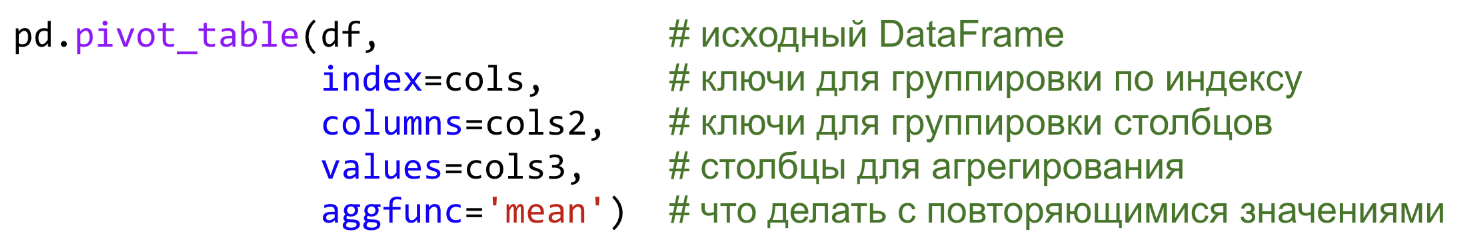

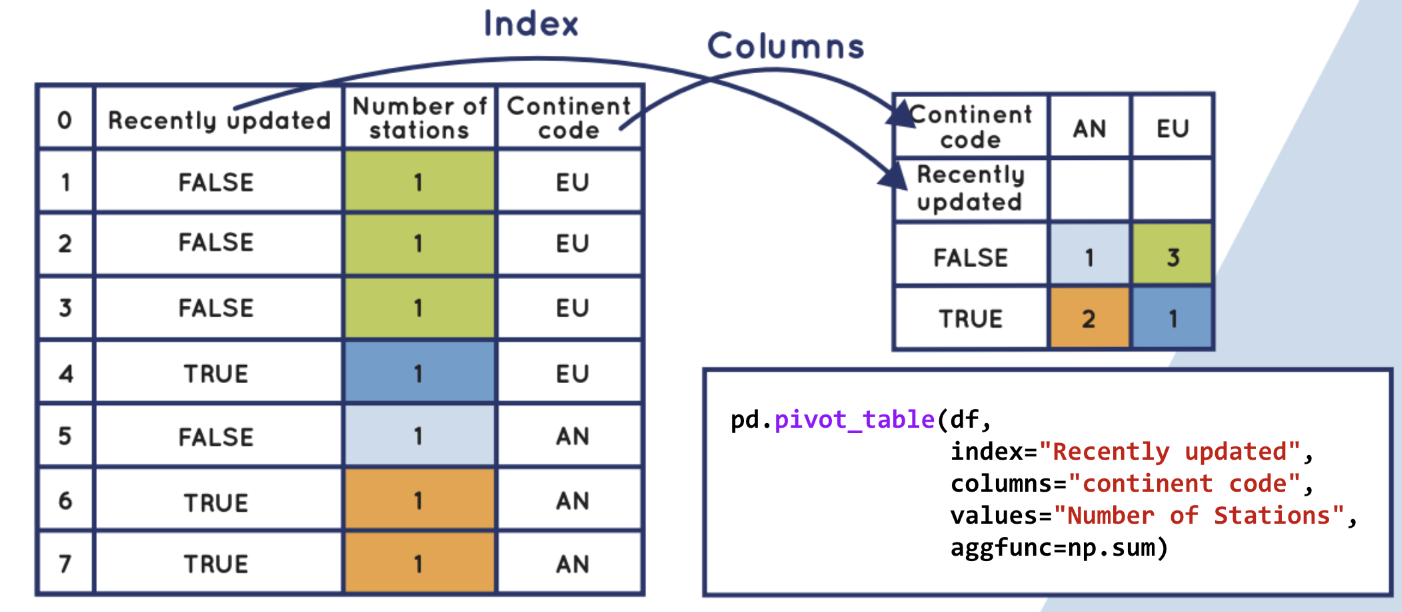

In [105]:

data_pivot = df.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
data_pivot.columns=['children', 'total_loans', 'dept_loans', 'dept_share']
data_pivot

,children,total_loans,dept_loans,dept_share
0,0,14021,1058,0.075458
1,1,4792,441,0.092028
2,2,2039,194,0.095145
3,3,328,27,0.082317
4,4,41,4,0.097561
5,5,9,0,0.000000


Число выданных кредитов для заемщиков без детей составляет 14090, из которых 13027 возвращены в срок и 1063 имеют просрочку. Доля возврата кредита для заемщиков без детей составляет 92.46%. Для заемщиков с одним ребенком - 90.77%, с двумя детьми - 90.55%, с тремя детьми - 91.82%, для заемщиков с 4-мя и 5-ю детьми доля возврата составила 90.24% и 100% соответственно. Можно сказать, что количество детей не влияет на возврат кредита в срок.

**Связь между кредитами и семейным положением**

In [107]:
# Применим написанную нами фукнцию get_share к столбцу 'family_status'
get_share(df, 'family_status')

,family_status,total_loans,debts_loans,debt_share,loans_share
0,Не женат / не замужем,2780,272,9.8%,13.1%
1,в разводе,1179,84,7.1%,5.6%
2,вдовец / вдова,946,62,6.6%,4.5%
3,гражданский брак,4112,383,9.3%,19.4%
4,женат / замужем,12213,923,7.6%,57.5%


In [109]:
# Получите аналогичную таблицу методом pivot_table()
data_pivot = df.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
data_pivot.columns=['children', 'total_loans', 'dept_loans', 'dept_share']
# Добавим столбец, который будет содержать сведения о доле выданных кредитов при соответствующем количестве детей
data_pivot['loans_share'] = data_pivot['total_loans']/data_pivot['total_loans'].sum()


#Форматируем как в original функции
result_pivot_styled = data_pivot.style.format({'dept_share': '{:.1%}', 'loans_share': '{:.1%}'})



result_pivot_styled


,children,total_loans,dept_loans,dept_share,loans_share
0,Не женат / не замужем,2780,272,9.8%,13.1%
1,в разводе,1179,84,7.1%,5.6%
2,вдовец / вдова,946,62,6.6%,4.5%
3,гражданский брак,4112,383,9.3%,19.4%
4,женат / замужем,12213,923,7.6%,57.5%


Наибольшее количество кредитов выдано женатым/замужним заемщикам. Доля возврата кредита в срок для всех категорий примерно одинаковая.
Для заемщиков в статусе 2 - вдова/вдовец доля возврата кредита в срок наибольшая и равна 93.43%, хотя кредитов таким заемщикам выдано наименьшее количество. Для заемщиков в статусе 3 - в разводе - доля возврата кредита в срок самая высокая и составляет 93.38%, хотя кредитов таким заемщикам выдано небольшое количество.
Наименьшую долю возврата кредита в срок имеют заемщики в статусе 1 (гражданский брак) и 4 (Не женат / не замужем).
Поэтому можно сказать, что наименее ответвенными заемщиками можно считать заемщиков, состоящих в гражданском браке, или не женатых/ не замужних.

**Распределение доходов должников и ответственных заёмщиков**

Сравним доход у должников и ответственных заёмщиков. Построим «график-скрипку» методом `violinplot()` из библиотеки `seaborn`. Такой график включает все параметры, которые показывает «ящик с усами», и отображает форму гистограммы.

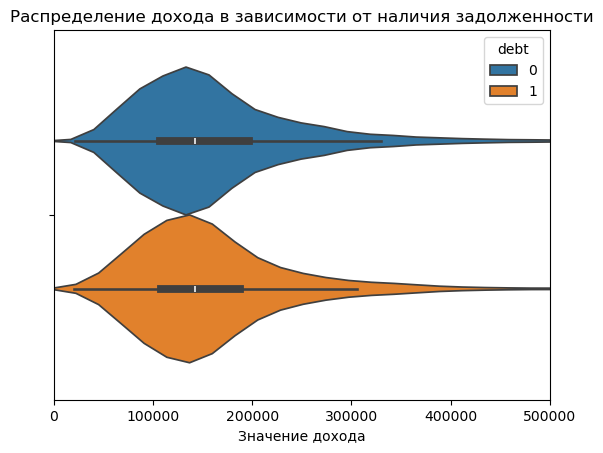

In [111]:
# строим график распределения дохода в зависимости от наличия задолженности в виде violinplot средствами seaborn
sns.violinplot(x=df['total_income'], hue=df['debt'])


# ограничиваем ось X для наглядности
plt.xlim(0, 500000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода в зависимости от наличия задолженности')
plt.xlabel('Значение дохода')
plt.ylabel(None)

# отображаем график на экране
plt.show()

Ответим на вопрос об изменении доходов. Распределение лучше всего смотреть на гистограмме. В библиотеке `seaborn` есть подходящий метод — `histplot()`.

Напомним, что `seaborn` — это надстройка над `matplotlib`, поэтому инструменты этих двух библиотек можно комбинировать. Для настройки стиля графика и некоторых других параметров будем использовать `matplotlib`, а сам график построим с помощью `seaborn`.

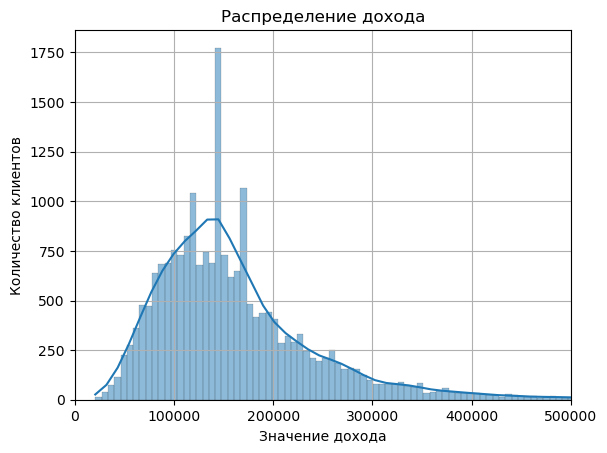

In [113]:
# строим гистограмму для столбца total_income, добавив график кривой KDE
sns.histplot(x=df['total_income'], kde=True)


# ограничиваем ось X для наглядности
plt.xlim(0, 500000)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода')
plt.xlabel('Значение дохода')
plt.ylabel('Количество клиентов')
plt.grid()
# отображаем график на экране
plt.show()

In [115]:

# Применим написанную нами фукнцию get_share к столбцу 'total_income_category'
get_share(df, 'total_income_category')

,total_income_category,total_loans,debts_loans,debt_share,loans_share
0,A,25,2,8.0%,0.1%
1,B,4987,353,7.1%,23.5%
2,C,15849,1346,8.5%,74.7%
3,D,347,21,6.1%,1.6%
4,E,22,2,9.1%,0.1%


In [117]:
# Получите аналогичную таблицу методом pivot_table()
data_pivot = df.pivot_table(index ='total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
data_pivot.columns=['children', 'total_loans', 'dept_loans', 'dept_share']
# Добавим столбец, который будет содержать сведения о доле выданных кредитов при соответствующем количестве детей
data_pivot['loans_share'] = data_pivot['total_loans']/data_pivot['total_loans'].sum()


#Форматируем как в original функции
result_pivot_styled = data_pivot.style.format({'dept_share': '{:.1%}', 'loans_share': '{:.1%}'})

result_pivot_styled

,children,total_loans,dept_loans,dept_share,loans_share
0,A,25,2,8.0%,0.1%
1,B,4987,353,7.1%,23.5%
2,C,15849,1346,8.5%,74.7%
3,D,347,21,6.1%,1.6%
4,E,22,2,9.1%,0.1%


Наибольшее количество кредитов выдано заемщикам со средним доходом от 50001 до 2000000 (категория С). Доля возврата кредита в срок для этой категории составила 0.9185. Для заемщиков с средним доходом 1000001 и выше (категория A)  выдано всего 2 кредита и только 1 возвращен в срок. Несмотря на то, что доля невозврата равна 50%, говорить о том, что это самые безответственные заемщики нельзя. Для заемщиков с доходами ниже 30000 (категория E) доля возврата кредита в срок также невысокая и составляет 90.90%, кредитов таким заемщикам выдано небольшое количество (всего 22). Тем не менее, можно сказать, что наименее ответвенными заемщиками можно считать заемщиков с доходами ниже 300000.

**Связь между доходом и образованием**

Теперь ответим на вопрос, влияет ли образование на уровень дохода и наличие задолженности. Попробуем отразить всё на одном графике.

Построим столбчатую диаграмму и повернём её набок. Чтобы сформировать столбцы, сгруппируем данные по категориям образования и вычислим медианный доход. Параметру `hue` метода `barplot()` передадим категории задолженности.

In [119]:

# группируем данные по образованию и задолженности и считаем медианный доход
grouped = df.groupby(['education', 'debt'])['total_income'].median().reset_index()
grouped

,education,debt,total_income
0,высшее,0,172160.0
1,высшее,1,165159.0
2,начальное,0,118514.0
3,начальное,1,129873.0
4,неоконченное высшее,0,153747.0
5,неоконченное высшее,1,181173.0
6,среднее,0,141513.0
7,среднее,1,142594.0
8,ученая степень,0,157259.5


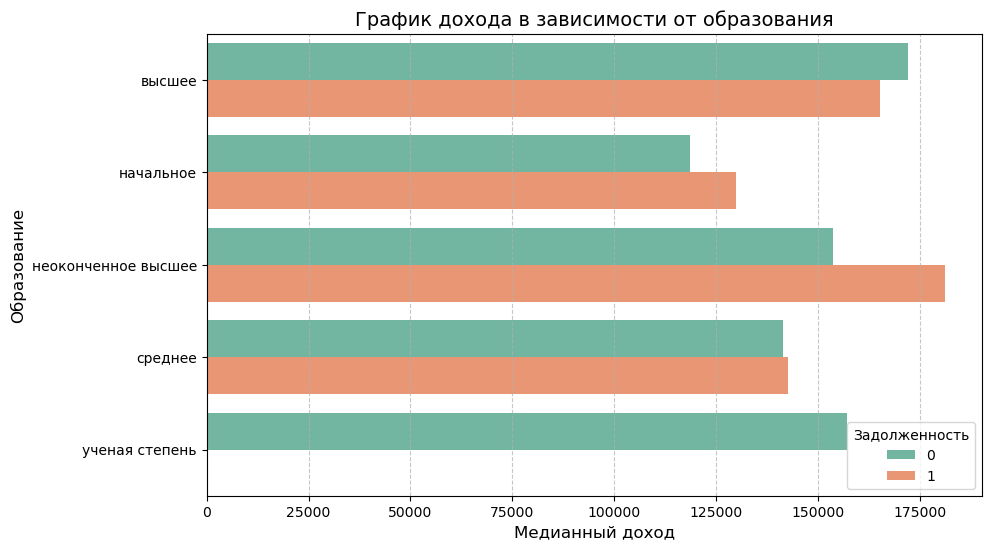

In [121]:
# назначаем размер графика
plt.figure(figsize=(10, 6))  # увеличил высоту, чтобы поместить все категории

# строим столбчатый график средствами seaborn, используем метод barplot
sns.barplot(data=grouped, 
            y='education',           # образование по оси Y
            x='total_income',        # доход по оси X
            hue='debt',              # цвет по задолженности
            orient='h',              # горизонтальная ориентация
            palette='Set2')

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования', fontsize=14)
plt.xlabel('Медианный доход', fontsize=12)
plt.ylabel('Образование', fontsize=12)

# Выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10, title='Задолженность')

# Добавляем сетку (по оси X — доход)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Отображаем график на экране
plt.show()

Должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще

**Связь между целью кредитования и задолженностью**

In [123]:
# Применим написанную нами фукнцию get_share к столбцу 'purpose_category'
get_share(df, 'purpose_category')

,purpose_category,total_loans,debts_loans,debt_share,loans_share
0,операции с автомобилем,4258,397,9.3%,20.1%
1,операции с недвижимостью,10703,777,7.3%,50.4%
2,получение образования,3970,369,9.3%,18.7%
3,проведение свадьбы,2299,181,7.9%,10.8%


In [125]:
# Получите аналогичную таблицу методом pivot_table()
# Получите аналогичную таблицу методом pivot_table()
data_pivot = df.pivot_table(index ='purpose_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
data_pivot.columns=['children', 'total_loans', 'dept_loans', 'dept_share']
# Добавим столбец, который будет содержать сведения о доле выданных кредитов при соответствующем количестве детей
data_pivot['loans_share'] = data_pivot['total_loans']/data_pivot['total_loans'].sum()


#Форматируем как в original функции
result_pivot_styled = data_pivot.style.format({'dept_share': '{:.1%}', 'loans_share': '{:.1%}'})

result_pivot_styled

,children,total_loans,dept_loans,dept_share,loans_share
0,операции с автомобилем,4258,397,9.3%,20.1%
1,операции с недвижимостью,10703,777,7.3%,50.4%
2,получение образования,3970,369,9.3%,18.7%
3,проведение свадьбы,2299,181,7.9%,10.8%


Наибольшее количество кредитов выдано для проведения различных операций с недвижимостью. Доля возврата кредита в срок для всех категорий примерно одинаковая. Поэтому нельзя говорить о том, что разные цели кредита влияют на его возврат в срок.

## Общий вывод

Напишите основные выводы по работе. Какие признаки из рассмотренных оказывают влияние на надёжность заёмщика?


Анализ показал, что уровень дохода и образование заёмщика оказывают определённое влияние на его кредитную надёжность.
Заемщики с низким уровнем дохода (ниже 30000) и с высоким (выше 1000000) демонстрируют более высокую долю просрочки по 
сравнению со средними категориями, однако объём выданных кредитов в этих группах значительно меньше, что снижает статистическую 
значимость выводов. Наибольшая доля просрочек наблюдается у заемщиков с доходом ниже 30000, что может свидетельствовать о повышенном 
риске при кредитовании данной категории. Что касается цели кредита, наибольший процент задолженности отмечается по кредитам на операции 
с автомобилем и получение образования (по 9.3%), в то время как займы на недвижимость, несмотря на их преобладание в общем портфеле, 
характеризуются более низкой долей просрочек (7.3%), вероятно, из-за обеспечения и тщательного анализа при выдаче. Образование также 
коррелирует с доходом и уровнем ответственности: категории с более высоким уровнем образования склонны иметь более стабильный доход и
меньшую склонность к просрочкам. Таким образом, наиболее значимыми факторами, влияющими на надёжность заёмщика, являются уровень дохода, 
цель кредита и, в меньшей степени, уровень образования.